# **Energy Generation and Consumption Forecasting**



**Objectives:**

**Data Analysis (1997-2017):**

Examine energy generation data (TWH) across different continents and countries for the years 1997 to 2017.
Analyze the split between renewable and non-renewable energy generation in the provided datasets.
Data Cleaning and Organization:

Clean datasets by addressing missing values, correcting inconsistencies, and standardizing formats.
Organize data into structured formats suitable for analysis and integration, ensuring alignment across different datasets.
Exploratory Data Analysis (EDA):

Perform EDA to identify key trends and patterns in energy generation over time and across regions.
Integrate renewable and non-renewable energy datasets to uncover broader insights and relationships.
Machine Learning Analysis:

**Feature Selection:**
Identify and select critical features that significantly impact energy generation (e.g., regional factors, energy type).
Feature Engineering:
Develop new features from existing data to improve the predictive power of models (e.g., interaction terms, time-based features).

**Modeling:**
Apply and compare various classification algorithms (e.g., decision trees, random forests) and regression techniques (e.g., linear regression, gradient boosting).
Evaluate model performance using metrics such as accuracy, precision, recall, and mean squared error.

**Prediction:**
Create predictive models to forecast energy generation trends and assess future scenarios based on historical data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
!ls


Continent_Consumption_TWH.csv  renewablesTotalPowerGeneration.csv
Country_Consumption_TWH.csv    sample_data


Load Datasets



In [6]:
continent_data = pd.read_csv('/content/sample_data/Continent_Consumption_TWH.csv')
country_data = pd.read_csv('/content/sample_data/Country_Consumption_TWH.csv')
renewable_data = pd.read_csv('/content/sample_data/renewablesTotalPowerGeneration.csv')

In [7]:
print(continent_data.describe())
print(country_data.describe())
print(renewable_data.describe())

              Year          World          OECD         BRICS        Europe  \
count    31.000000      31.000000     31.000000     31.000000     31.000000   
mean   2005.000000  132792.465484  60396.465806  41128.932258  21487.738065   
std       9.092121   22724.116555   3480.622930  13849.968002    899.171139   
min    1990.000000  101855.540000  52602.490000  25993.050000  19643.070000   
25%    1997.500000  111176.985000  58719.870000  27504.950000  20875.850000   
50%    2005.000000  133582.180000  61545.960000  38169.660000  21480.610000   
75%    2012.500000  154853.450000  62360.060000  55521.620000  21951.625000   
max    2020.000000  167553.410000  64883.770000  63255.570000  23108.810000   

       North America  Latin America          Asia      Pacific       Africa  \
count      31.000000      31.000000     31.000000    31.000000    31.000000   
mean    28226.760323    7897.145161  45402.019355  1563.297097  6851.945806   
std      1548.243608    1537.717304  15511.849313  

**About the Datasets**

**Continent Data:**

Year → Year of the recorded data

World → Total energy generation (TWH) for the entire world

OECD → Energy generation (TWH) by OECD countries

BRICS → Energy generation (TWH) by BRICS countries

note: other columns are represnted by continent names

**Country Data:**

Year → Year of the recorded data

note: other columns are represnted by country names

**Renewable Generation Data:**

Mode of Generation → Type of renewable energy generation (e.g., solar, wind, hydro)

Contribution_TWH → Amount of energy generated (TWH) by the specified mode of generation

Displaying the first five rows of the above datasets

In [11]:

print("Continent Data:\n", continent_data.head())
print("Country Data:\n", country_data.head())
print("Renewable Generation Data:\n", renewable_data.head())

Continent Data:
    Year      World      OECD     BRICS    Europe  North America  \
0  1990  101855.54  52602.49  26621.07  20654.88       24667.23   
1  1991  102483.56  53207.25  26434.99  20631.62       24841.68   
2  1992  102588.23  53788.75  25993.05  20189.68       25341.77   
3  1993  103646.56  54614.48  26283.80  20189.68       25830.23   
4  1994  104449.03  55579.77  25993.05  20085.01       26365.21   

   Latin America      Asia  Pacific   Africa  Middle-East       CIS  
0        5373.06  24574.19  1197.89  4407.77      2581.86  16049.40  
1        5500.99  24783.53  1186.26  4535.70      2744.68  15898.21  
2        5628.92  25690.67  1209.52  4582.22      3081.95  14339.79  
3        5675.44  26876.93  1267.67  4721.78      3349.44  13246.57  
4        5989.45  28098.08  1279.30  4803.19      3640.19  11606.74  
Country Data:
      Year  China  United States  Brazil  Belgium  Czechia  France  Germany  \
0  1990.0  874.0         1910.0   141.0     48.0     50.0   225.0  

Displaying the last five rows of the above datasets

In [39]:
print("Continent Data:\n", continent_data.tail())
print("Country Data:\n", country_data.tail())
print("Renewable Generation Data:\n", renewable_data.tail())

Continent Data:
 Index(['Year', 'World', 'OECD', 'BRICS', 'Europe', 'North America',
       'Latin America', 'Asia', 'Pacific', 'Africa', 'Middle-East', 'CIS'],
      dtype='object')
Country Data:
 Index(['Year', 'China', 'United States', 'Brazil', 'Belgium', 'Czechia',
       'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Turkey',
       'Kazakhstan', 'Russia', 'Ukraine', 'Uzbekistan', 'Argentina', 'Canada',
       'Chile', 'Colombia', 'Mexico', 'Venezuela', 'Indonesia', 'Japan',
       'Malaysia', 'South Korea', 'Taiwan', 'Thailand', 'India', 'Australia',
       'New Zealand', 'Algeria', 'Egypt', 'Nigeria', 'South Africa', 'Iran',
       'Kuwait', 'Saudi Arabia', 'United Arab Emirates'],
      dtype='object')
Renewable Generation Data:
 Index(['Mode of Generation', 'Contribution_TWH', 'Country'], dtype='object')


describe the datasets

In [38]:
print(continent_data.describe())
print(country_data.describe())
print(renewable_data.describe())

              Year          World          OECD         BRICS        Europe  \
count    31.000000      31.000000     31.000000     31.000000     31.000000   
mean   2005.000000  132792.465484  60396.465806  41128.932258  21487.738065   
std       9.092121   22724.116555   3480.622930  13849.968002    899.171139   
min    1990.000000  101855.540000  52602.490000  25993.050000  19643.070000   
25%    1997.500000  111176.985000  58719.870000  27504.950000  20875.850000   
50%    2005.000000  133582.180000  61545.960000  38169.660000  21480.610000   
75%    2012.500000  154853.450000  62360.060000  55521.620000  21951.625000   
max    2020.000000  167553.410000  64883.770000  63255.570000  23108.810000   

       North America  Latin America          Asia      Pacific       Africa  \
count      31.000000      31.000000     31.000000    31.000000    31.000000   
mean    28226.760323    7897.145161  45402.019355  1563.297097  6851.945806   
std      1548.243608    1537.717304  15511.849313  

checking for null values


**Data Cleanup and Exploratory Data Analysis (EDA):**

**Data cleanup** involves addressing missing values, correcting inconsistencies, and standardizing formats to ensure dataset integrity. This step includes handling outliers, normalizing units, and merging data from multiple sources for consistency.

**Exploratory Data Analysis (EDA)** follows, aiming to uncover patterns and insights within the datasets. EDA involves visualizing trends in energy generation and consumption over time and across different regions, such as using line charts for temporal analysis and heatmaps for regional comparisons. This phase helps identify significant trends, correlations, and anomalies in both renewable and non-renewable energy data. Effective EDA lays the groundwork for more detailed analysis and model building by highlighting key features and relationships within the data.

In [13]:
# Check for null values
print("Continent Data Null Values:\n", continent_data.isnull().sum())
print("Country Data Null Values:\n", country_data.isnull().sum())
print("Renewable Generation Data Null Values:\n", renewable_data.isnull().sum())

Continent Data Null Values:
 Year             0
World            0
OECD             0
BRICS            0
Europe           0
North America    0
Latin America    0
Asia             0
Pacific          0
Africa           0
Middle-East      0
CIS              0
dtype: int64
Country Data Null Values:
 Year                    2
China                   2
United States           2
Brazil                  2
Belgium                 2
Czechia                 2
France                  2
Germany                 2
Italy                   2
Netherlands             2
Poland                  2
Portugal                2
Romania                 2
Spain                   2
Sweden                  2
United Kingdom          2
Norway                  2
Turkey                  2
Kazakhstan              2
Russia                  2
Ukraine                 2
Uzbekistan              2
Argentina               2
Canada                  2
Chile                   2
Colombia                2
Mexico                  2
V

from the above results , the null values are only present in country datasets
Let's replace the null values with mean values

In [14]:
country_data.fillna(country_data.mean(), inplace=True)

Dropping the duplicates

In [15]:
continent_data.drop_duplicates(inplace=True)
country_data.drop_duplicates(inplace=True)
renewable_data.drop_duplicates(inplace=True)


**EDA and Visualizations**

Continent data bar plot

In [8]:
# Reshape continent_data for plotting
continent_data_melt = continent_data.melt(id_vars=['Year'],
                                          value_vars=['World', 'OECD', 'BRICS', 'Europe', 'North America', 'Latin America', 'Asia', 'Pacific', 'Africa', 'Middle-East', 'CIS'],
                                          var_name='Continent',
                                          value_name='Consumption_TWH')

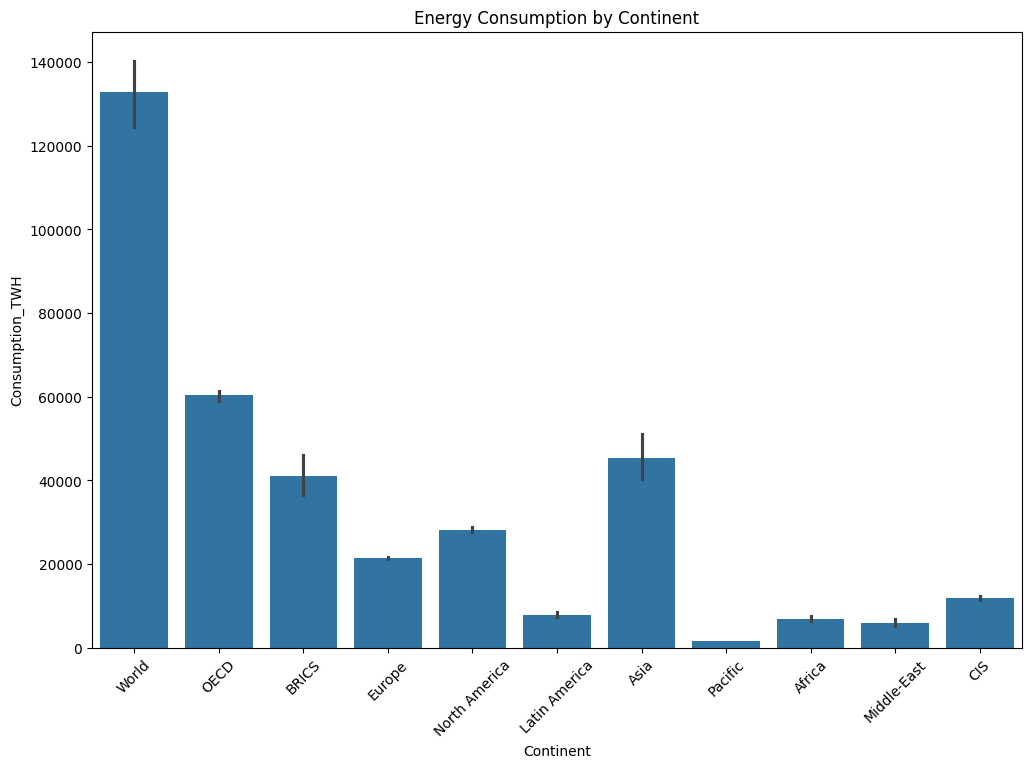

In [9]:
# Continent Consumption Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Continent', y='Consumption_TWH', data=continent_data_melt)
plt.title('Energy Consumption by Continent')
plt.xticks(rotation=45)
plt.show()

OECD and BRICS: The "OECD" and "BRICS" regions demonstrate substantial energy consumption, indicating their significant roles in global energy usage.

Continental Variations: There's a considerable disparity in energy consumption across continents. "Europe," "North America," and "Latin America" showcase notably higher consumption levels compared to "Africa," "Middle East," "Pacific," and "CIS."

In [21]:
# Reshape country_data for plotting
country_data_melt = country_data.melt(id_vars=['Year'],
                                      value_vars=country_data.columns[1:],
                                      var_name='Country',
                                      value_name='Consumption_TWH')

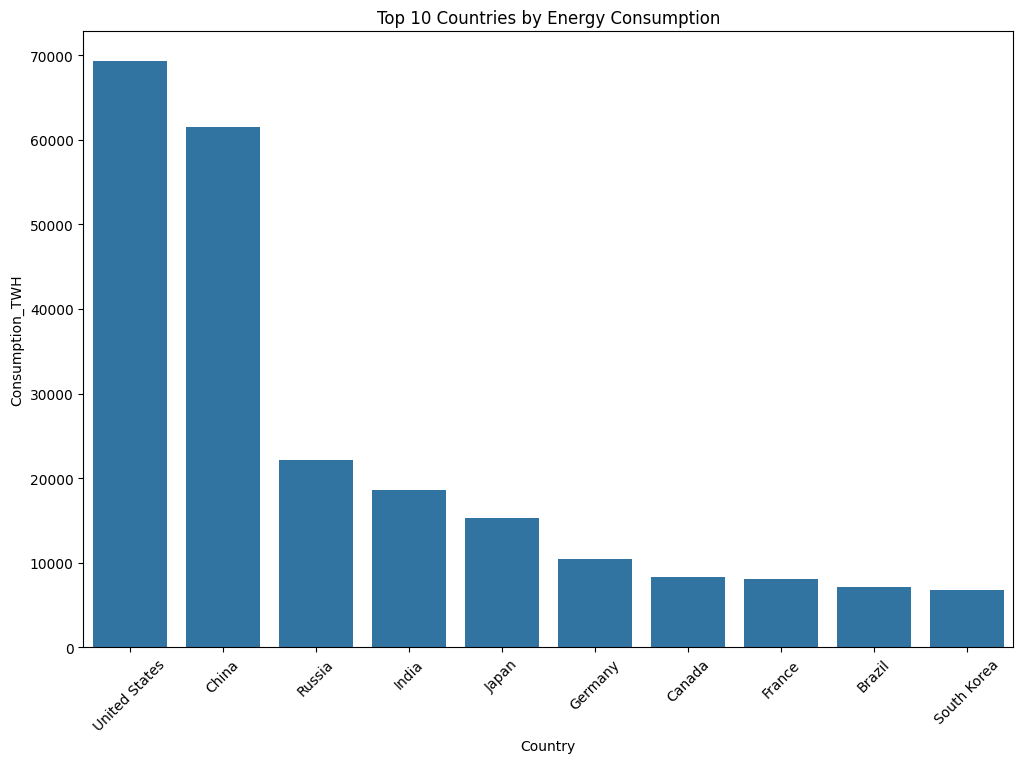

In [22]:
# Country Consumption Bar Plot
plt.figure(figsize=(12, 8))
top_countries = country_data_melt.groupby('Country')['Consumption_TWH'].sum().nlargest(10).reset_index()
sns.barplot(x='Country', y='Consumption_TWH', data=top_countries)
plt.title('Top 10 Countries by Energy Consumption')
plt.xticks(rotation=45)
plt.show()

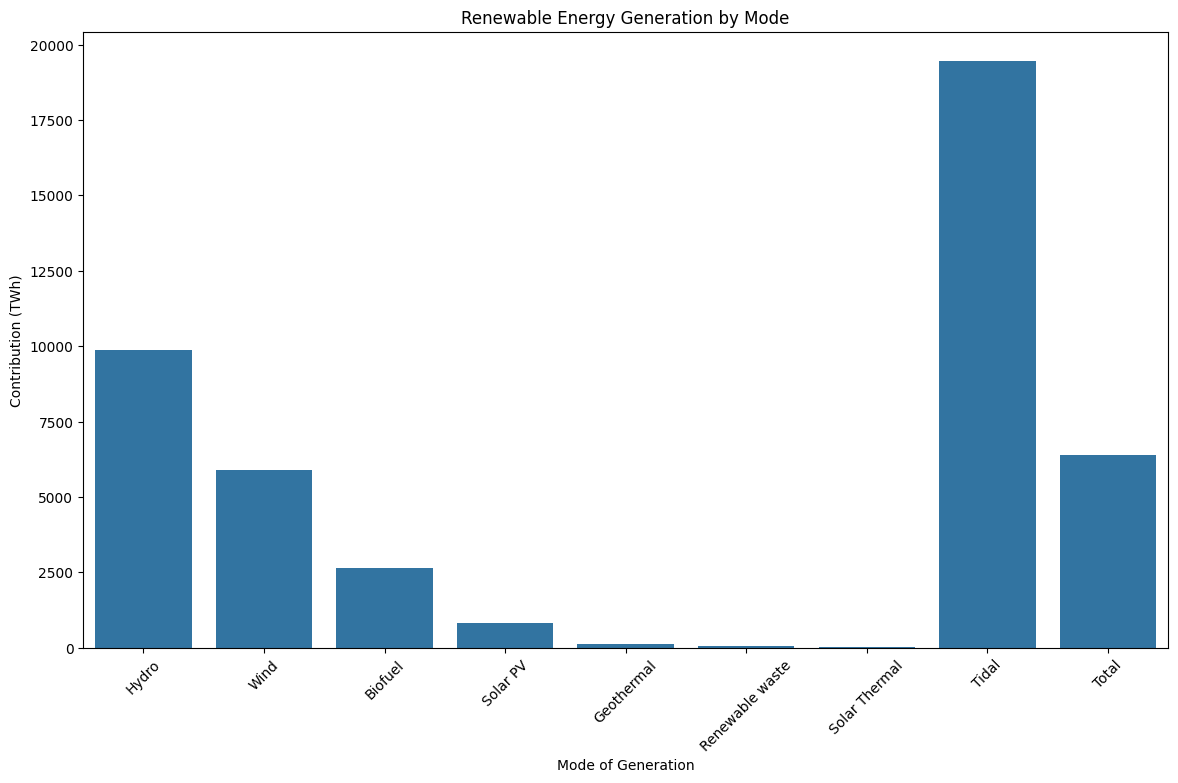

In [25]:
# Renewable Generation Bar Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Mode of Generation', y='Contribution (TWh)', data=renewable_data)
plt.title('Renewable Energy Generation by Mode')
plt.xticks(rotation=45)
plt.show()

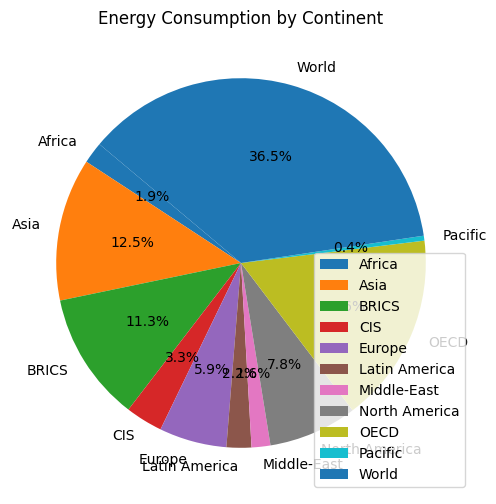

In [26]:
# Pie Plot of Continent Energy Consumption
plt.figure(figsize=(10, 6))
continent_consumption = continent_data_melt.groupby('Continent')['Consumption_TWH'].sum()
continent_consumption.plot.pie(autopct='%1.1f%%', startangle=140, legend=True)
plt.title('Energy Consumption by Continent')
plt.ylabel('')
plt.show()

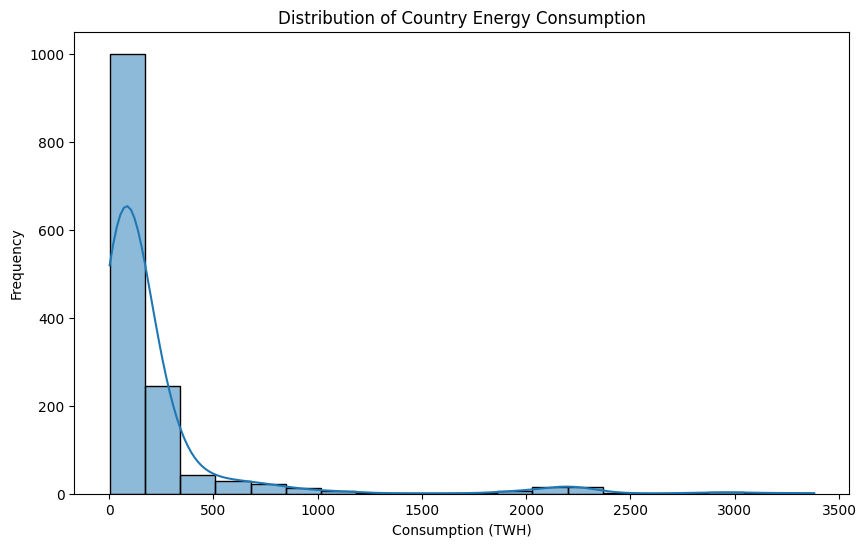

In [27]:
# Histogram of Country Energy Consumption
plt.figure(figsize=(10, 6))
sns.histplot(country_data_melt['Consumption_TWH'], bins=20, kde=True)
plt.title('Distribution of Country Energy Consumption')
plt.xlabel('Consumption (TWH)')
plt.ylabel('Frequency')
plt.show()

**Skewed Distribution:** The energy consumption data exhibits a right-skewed distribution, indicating that a majority of countries consume relatively low amounts of energy, while a smaller number of countries consume significantly higher amounts.

**Long Tail:**The distribution has a long tail, suggesting the presence of several outliers with exceptionally high energy consumption levels. These could be major industrialized nations or countries with substantial energy-intensive industries.

**Peak Concentration:**The distribution has a pronounced peak around the 0-500 TWh range, suggesting a significant concentration of countries within this consumption bracket. This might represent smaller countries or those with developing economies.

**Bimodal Tendencies:** The distribution shows a slight bimodal tendency, with a second, less prominent peak around the 2500 TWh range. This could indicate the presence of two distinct groups of countries based on their energy consumption levels.

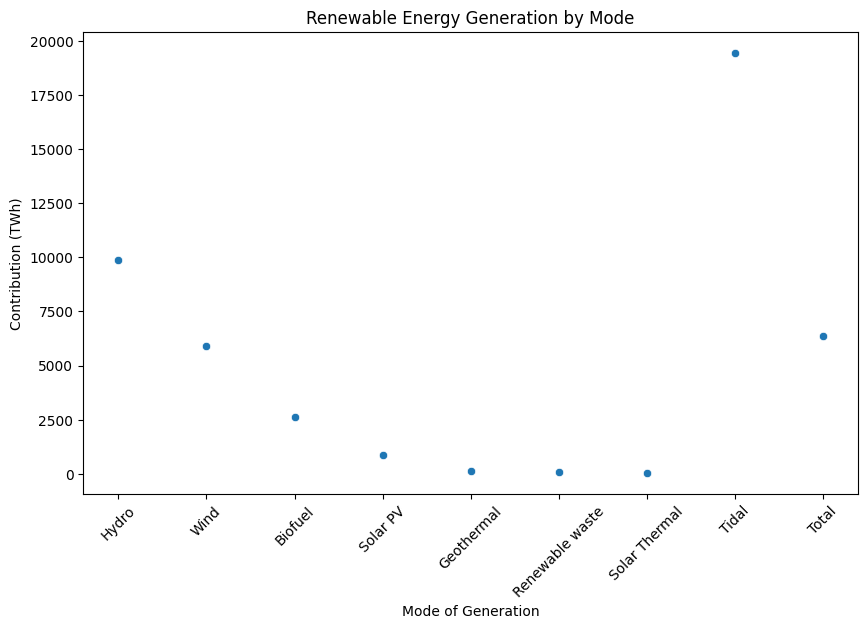

In [28]:
# Scatter Plot of Renewable Contributions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mode of Generation', y='Contribution (TWh)', data=renewable_data)
plt.title('Renewable Energy Generation by Mode')
plt.xlabel('Mode of Generation')
plt.ylabel('Contribution (TWh)')
plt.xticks(rotation=45)
plt.show()

The dominance of hydropower could be attributed to established infrastructure and abundant water resources in certain regions.
The significant contributions of wind and biofuel might reflect technological advancements and policy support for these renewable sources.
The relatively lower contributions of solar PV and geothermal could be due to higher installation costs or geographical limitations.
The minimal contributions of renewable waste, solar thermal, and tidal generation might be associated with technological challenges or limited resource availability.

In [30]:
# Preparing data for predictive modeling
# Merge datasets for modeling
# Assuming renewable_data contains columns 'Renewables' and 'Non_Renewables'
renewable_data.rename(columns={'Contribution (TWh)': 'Contribution_TWH'}, inplace=True)
renewable_data['Country'] = 'Global'  # Adding a dummy 'Country' column for merging
merged_data = pd.merge(country_data_melt, renewable_data, left_on='Country', right_on='Country', how='left')


In [31]:
# Predictive Modeling
# Linear Regression to predict consumption based on renewable and non-renewable generation
# Assuming 'Renewables' and 'Non_Renewables' are columns in renewable_data
# In this case, we don't have 'Non_Renewables', so we'll use 'Contribution_TWH' instead
X = merged_data[['Contribution_TWH']].fillna(0)  # Fill NaN values with 0 for the model
y = merged_data['Consumption_TWH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
y_pred = lr_model.predict(X_test_scaled)
print("Linear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Linear Regression Results:
Mean Squared Error: 243152.07957787422
R2 Score: -0.002435801442040031


In [35]:
# Classification to predict if a country's consumption is above or below median
merged_data['High_Consumption'] = (merged_data['Consumption_TWH'] > merged_data['Consumption_TWH'].median()).astype(int)
X_class = merged_data[['Contribution_TWH']].fillna(0)
y_class = merged_data['High_Consumption']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


In [36]:

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_class, y_train_class)

y_pred_class = rf_model.predict(X_test_class)
print("Random Forest Classification Results:")
print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))

Random Forest Classification Results:
[[137   0]
 [145   0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.65       137
           1       0.00      0.00      0.00       145

    accuracy                           0.49       282
   macro avg       0.24      0.50      0.33       282
weighted avg       0.24      0.49      0.32       282



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
